In [1]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [2]:
df = california_housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.shape

(20640, 9)

In [4]:
x= df.iloc[:, :].values
#y= df.iloc[:, -1].values

In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaled_features = StandardScaler().fit_transform(x)

In [6]:
from sklearn.decomposition import PCA
pca_calif = PCA(n_components=2)
principalComponents_calif = pca_calif.fit_transform(scaled_features)

In [7]:
x1 = pd.DataFrame(data=principalComponents_calif, columns = ['principal component 1', 'principal component 2'])

In [8]:
x1.shape

(20640, 2)

In [9]:
from sklearn.cluster import KMeans

In [10]:
#training the K-means model on a dataset  
k = [2, 3, 4, 5]
clusters=[]
for i in k:
  kmeans = KMeans(n_clusters=i, n_init='auto', random_state= 101, max_iter=10**4, tol=1e-3)  
  y_predict= kmeans.fit_predict(x1)
  clusters.append(y_predict)

In [11]:
clusters

[array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([2, 2, 0, ..., 0, 0, 0], dtype=int32),
 array([2, 2, 0, ..., 0, 0, 0], dtype=int32),
 array([2, 0, 0, ..., 0, 0, 0], dtype=int32)]

In [12]:
from sklearn.decomposition import PCA
pca_calif = PCA(n_components=3)
principalComponents_calif = pca_calif.fit_transform(scaled_features)

In [13]:
x2 = pd.DataFrame(data=principalComponents_calif, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [14]:
x2.shape

(20640, 3)

In [15]:
#training the K-means model on a dataset  
k = [2, 3, 4, 5]
clusters1=[]
for i in k:
  kmeans = KMeans(n_clusters=i, n_init='auto', random_state= 101, max_iter=10**5, tol=1e-3)  
  y_predict= kmeans.fit_predict(x2)
  clusters1.append(y_predict)

In [16]:
clusters1

[array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
 array([4, 4, 4, ..., 0, 0, 0], dtype=int32)]

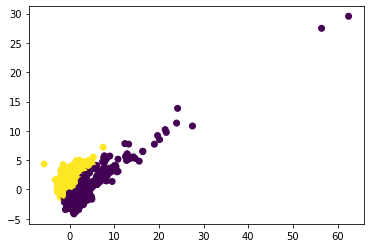

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x1['principal component 1'], x1['principal component 2'], c=clusters[0])

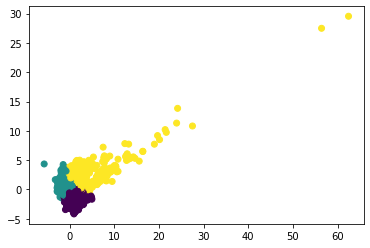

In [18]:
plt.scatter(x1['principal component 1'], x1['principal component 2'], c=clusters[1])

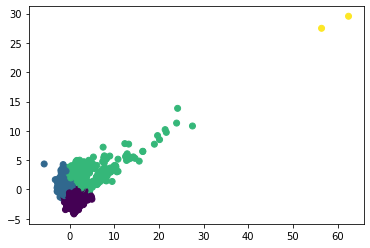

In [19]:
plt.scatter(x1['principal component 1'], x1['principal component 2'], c=clusters[2])

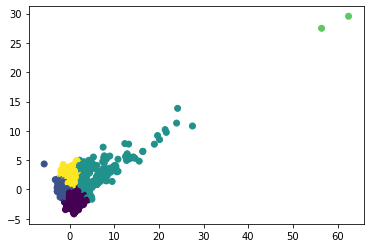

In [20]:
plt.scatter(x1['principal component 1'], x1['principal component 2'], c=clusters[3])

For L1

In [21]:
import numpy as np
import random as rd

In [22]:
class KMeans_l1:
    def __init__(self,k):
        self.k = k

    def fit(self,X,MAXITER = 10**5, TOL = 1e-3):
        centroids = np.random.rand(self.k,X.shape[1])
        centroidsold = centroids.copy()
        for iter_ in range(MAXITER):
            dist = np.linalg.norm(X - centroids[0,:],axis=1,ord=1).reshape(-1,1)
            for class_ in range(1,self.k):
                dist = np.append(dist,np.linalg.norm(X - centroids[class_,:],axis=1,ord=1).reshape(-1,1),axis=1)
            classes = np.argmin(dist,axis=1)
            # update position
            for class_ in set(classes):
                centroids[class_,:] = np.mean(X[classes == class_,:],axis=0)
            if np.linalg.norm(centroids - centroidsold,ord=1) < TOL:
                break
                print('Centroid converged')
        self.centroids = centroids
    def predict(self,X):
        dist = np.linalg.norm(X - self.centroids[0,:],axis=1,ord=1).reshape(-1,1)
        for class_ in range(1,self.k):
            dist = np.append(dist,np.linalg.norm(X - self.centroids[class_,:],axis=1,ord=1).reshape(-1,1),axis=1)
        classes = np.argmin(dist,axis=1)
        return classes

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
x1 = x1.to_numpy()
x2 = x2.to_numpy()

In [25]:
kmeans = KMeans_l1(2)
kmeans.fit(x1)
classes=kmeans.predict(x1)
pd.DataFrame(classes)

,0
0,0
1,0
2,0
3,0
4,0
...,...
20635,0
20636,0
20637,0
20638,0


In [26]:
kmeans = KMeans_l1(2)
kmeans.fit(x2)
classes=kmeans.predict(x2)
pd.DataFrame(classes)

,0
0,1
1,1
2,1
3,1
4,1
...,...
20635,1
20636,1
20637,1
20638,1


In [27]:
kmeans = KMeans_l1(3)
kmeans.fit(x1)
classes=kmeans.predict(x1)
pd.DataFrame(classes)

,0
0,1
1,1
2,2
3,2
4,2
...,...
20635,2
20636,2
20637,2
20638,2


In [28]:
kmeans = KMeans_l1(3)
kmeans.fit(x2)
classes=kmeans.predict(x2)
pd.DataFrame(classes)

,0
0,0
1,0
2,0
3,0
4,1
...,...
20635,1
20636,1
20637,1
20638,1


In [29]:
kmeans = KMeans_l1(4)
kmeans.fit(x1)
classes=kmeans.predict(x1)
pd.DataFrame(classes)

,0
0,2
1,2
2,0
3,0
4,0
...,...
20635,0
20636,0
20637,0
20638,0


In [30]:
kmeans = KMeans_l1(4)
kmeans.fit(x2)
classes=kmeans.predict(x2)
pd.DataFrame(classes)

,0
0,3
1,3
2,3
3,3
4,3
...,...
20635,0
20636,0
20637,0
20638,0


In [31]:
kmeans = KMeans_l1(5)
kmeans.fit(x1)
classes=kmeans.predict(x1)
pd.DataFrame(classes)

,0
0,4
1,4
2,4
3,4
4,4
...,...
20635,0
20636,0
20637,0
20638,0


In [32]:
kmeans = KMeans_l1(5)
kmeans.fit(x2)
classes=kmeans.predict(x2)
pd.DataFrame(classes)

,0
0,2
1,2
2,2
3,2
4,2
...,...
20635,1
20636,1
20637,1
20638,1
